In [ ]:
#Import Library yang dibutuhkan

import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt 

In [ ]:
#Load Dataset

df = pd.read_csv("/content/marketing_campaign.csv")

df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [ ]:
#Mendapatkan informasi fitur data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#Drop row yang memiliki missing values

print("Jumlah data points:", len(df))

df = df.dropna()
print("Data points setelah cleaning : ", len(df))

Jumlah data points: 2240
Data points setelah cleaning :  2216


In [ ]:
#Fitur Jumlah Hari Berbelanja

df['Dt_Customer'] = pd.to_datetime(df["Dt_Customer"])
tanggal = []

for i in df["Dt_Customer"]:
  i = i.date()
  tanggal.append(i)

print("Tanggal belanja paling kini : ", max(tanggal))
print("Tanggal belanja paling awal : ", min(tanggal))

#Fitur "Customer_For"

day1 = max(tanggal)
jumlah_hari = []

for i in tanggal:
  temp = day1 - i
  jumlah_hari.append(temp)

df["Customer_For"] = jumlah_hari
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

df["Customer_For"].head(10)

Tanggal belanja paling kini :  2014-12-06
Tanggal belanja paling awal :  2012-01-08


0    83894400000000000
1    10800000000000000
2    40780800000000000
3     5616000000000000
4    27734400000000000
5    39139200000000000
6    65059200000000000
7    42163200000000000
8    47347200000000000
9    23155200000000000
Name: Customer_For, dtype: int64

In [ ]:
#Fitur "Age"

df["Age"] = 2022 - df["Year_Birth"]
df["Age"].head(10)

0    65
1    68
2    57
3    38
4    41
5    55
6    51
7    37
8    48
9    72
Name: Age, dtype: int64

In [ ]:
#Fitur "Spent"

df["Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df["Spent"].head(10)

0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: Spent, dtype: int64

In [ ]:
#Cek isi dari "Marital Status"

df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
#Fitur "Living With"

df["Living_With"] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
df["Living_With"].head(10)


0      Alone
1      Alone
2    Partner
3    Partner
4    Partner
5    Partner
6      Alone
7    Partner
8    Partner
9    Partner
Name: Living_With, dtype: object

In [ ]:
#Fitur "Children"

df["Children"]=df["Kidhome"] + df["Teenhome"]
df["Children"].head(10)

0    0
1    2
2    0
3    1
4    1
5    1
6    1
7    1
8    1
9    2
Name: Children, dtype: int64

In [ ]:
#Fitur "Family_Size"

df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2}) + df["Children"]
df["Family_Size"].head(10)

0    1
1    3
2    2
3    3
4    3
5    3
6    2
7    3
8    3
9    4
Name: Family_Size, dtype: int64

In [ ]:
#Fitur "Is_Parent"

df["Is_Parent"] = np.where(df.Children > 0, 1, 0)
df["Is_Parent"].head(10)

0    0
1    1
2    0
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Is_Parent, dtype: int64

In [ ]:
#Cek isi dari "Education"

df["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
#Fitur "Education"

df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
df["Education"].unique()

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

In [ ]:
#Drop fitur redundant

feature_to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(feature_to_drop, axis=1)
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,53.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,26.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,45.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,52.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,63.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,129.000000,2525.000000,3.000000,5.000000,1.000000


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 432x288 with 0 Axes>

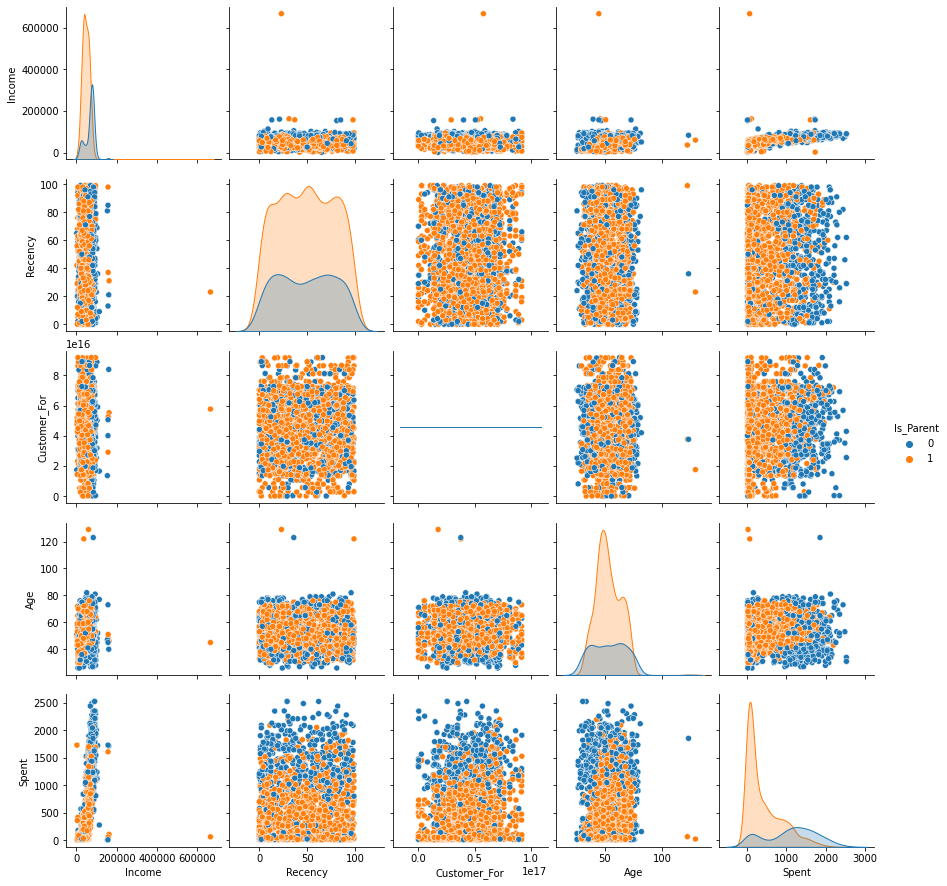

In [ ]:
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "Is_Parent")

plt.show()

Reletive Plot Of Some Selected Features after Drop Outlier: A Data Subset


<Figure size 432x288 with 0 Axes>

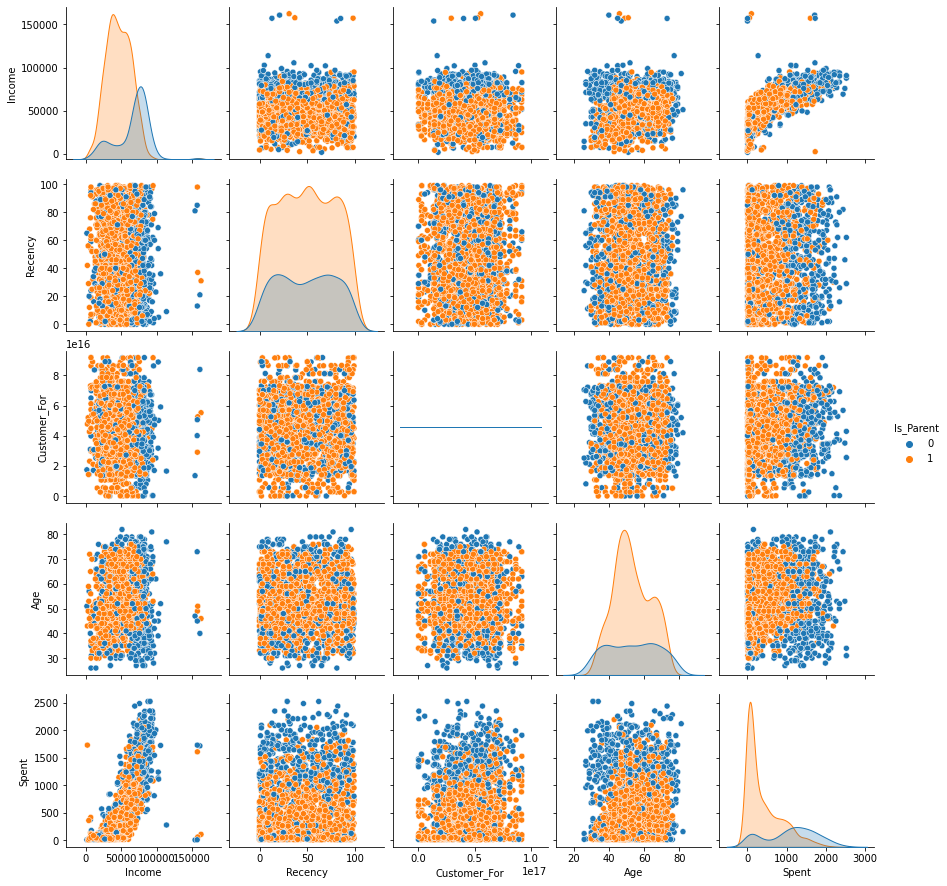

In [ ]:
#Drop outlier pada data "Income" dan "Age"

df = df[(df["Age"] < 90)]
df = df[(df["Income"] < 600000)]

To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features after Drop Outlier: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "Is_Parent")

plt.show()

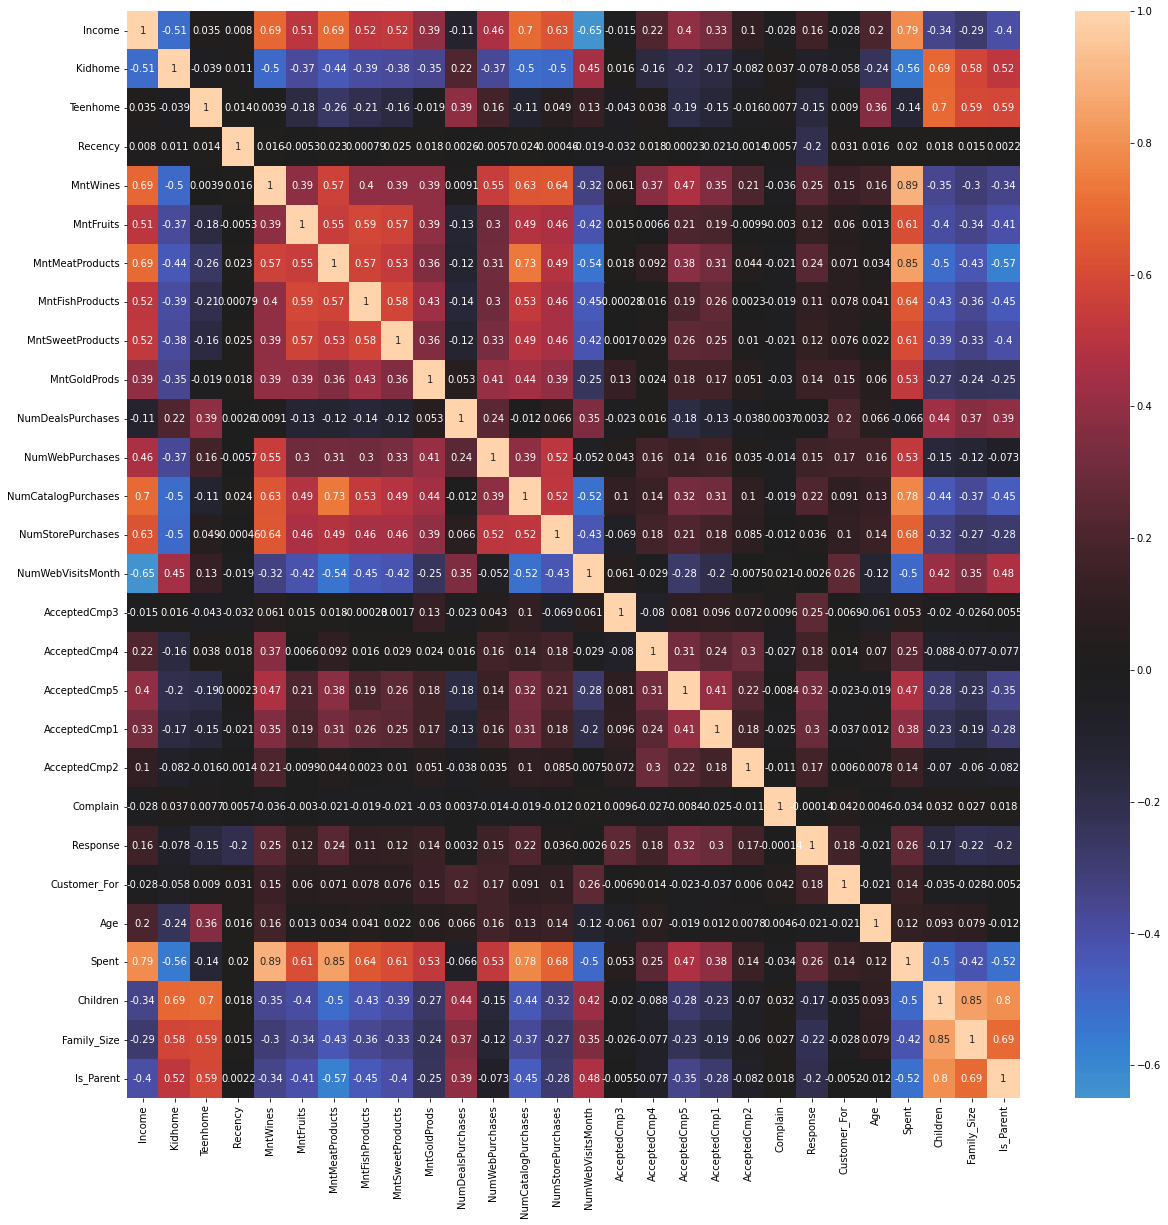

In [ ]:
#Correlation Matrix
corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)

## **2. Data Pre-Processing**

In [ ]:
#Import Library Pre-Processing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
#Labeling categorical features

a = (df.dtypes == 'object')
object_list = list(a[a].index)

print("Categorical variables : ", object_list)

LE=LabelEncoder()
for i in object_list:
    df[i]=df[[i]].apply(LE.fit_transform)

Categorical variables :  ['Education', 'Living_With']


In [ ]:
#Subset dataframe dengan menghapus fitur terkait penawarann yang diterima dan promosi

ds = df.copy()
col_to_drop = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(col_to_drop, axis = 1)

scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns)

scaled_ds.head(10)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456
5,0.571657,0.490381,-0.822754,0.908097,-1.141097,0.636663,0.394373,-0.307889,-0.687527,0.363993,...,0.453643,1.290224,0.279818,-0.254385,0.163575,0.180505,0.740959,0.069987,0.449070,0.632456
6,-0.893586,0.170807,-0.822754,0.908097,-0.519047,-0.208416,0.973207,-0.013514,0.225554,0.534385,...,0.111982,0.367205,0.279818,1.035944,-0.178336,-0.028667,-1.349603,0.069987,-0.654644,0.632456
7,0.571657,-0.859793,1.040021,-0.929699,-0.588164,-0.679881,-0.410961,-0.495218,-0.632742,-0.634019,...,-0.913000,-0.555814,1.104543,-0.103847,-1.375024,-0.727564,0.740959,0.069987,0.449070,0.632456
8,0.571657,-1.003968,1.040021,-0.929699,-1.037422,-0.863722,-0.662628,-0.637946,-0.632742,-0.585335,...,-0.913000,-1.171160,1.516906,0.154219,-0.434769,-0.931755,0.740959,0.069987,0.449070,0.632456
9,0.571657,-2.151748,1.040021,0.908097,0.655937,-0.822210,-0.662628,-0.718230,-0.669265,-0.634019,...,-0.913000,-1.786506,6.052898,-1.050088,1.616696,-0.926775,0.740959,1.404572,1.552784,0.632456


## **3. Dimensionality Reduction**

In [ ]:
#Import Library PCA

from sklearn.decomposition import PCA

In [ ]:
#Implementasi Principal Component Analysis (PCA) untuk reduce features

pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2","col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,4.497106e-17,2.878377,-5.969394,-2.538493,-0.780421,2.383290,7.444305
col2,2212.0,4.216037e-17,1.706839,-4.312308,-1.328350,-0.158121,1.242390,6.142914
col3,2212.0,6.856079e-17,1.221951,-3.532495,-0.827388,-0.021205,0.798945,6.619325


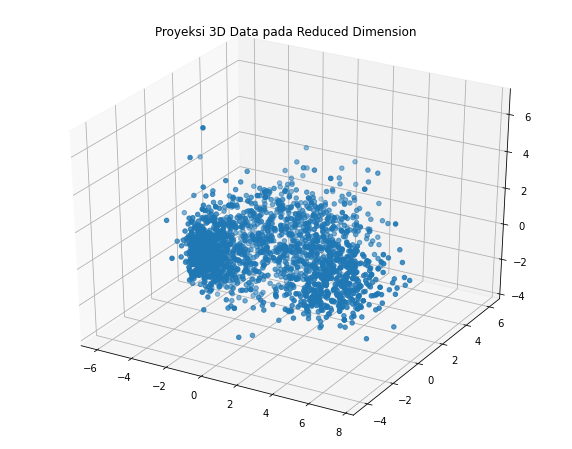

In [ ]:
#Plotting Data

x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o")
ax.set_title("Proyeksi 3D Data pada Reduced Dimension")
plt.show()

## **4. Clustering**

In [ ]:
#Import Library K-Means
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

### **K-Means Clustering**

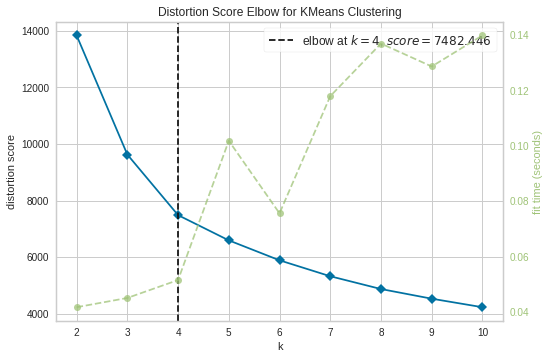

In [ ]:
#Metode Elbow untuk mencari jumlah  cluster

model = KMeans()
Elbow_M = KElbowVisualizer(model, k=10)

Elbow_M.fit(PCA_ds)        # Fit the data to the visualizer
Elbow_M.show()             # Finalize and render the figure

In [ ]:
km = KMeans(n_clusters=4, random_state=42)

yhat_AC = km.fit_predict(PCA_ds)

PCA_ds["Clusters"] = yhat_AC   # for evaluating the model
df["Clusters"]= yhat_AC        # for customers profiling

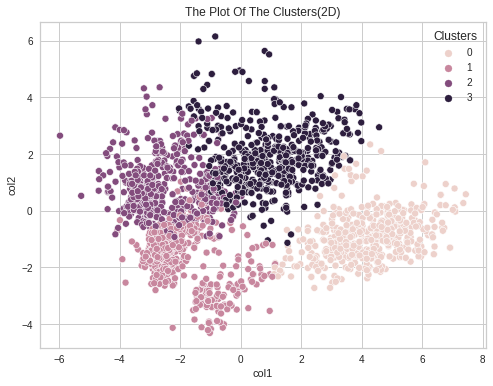

In [ ]:
plt.figure(figsize=(8,6))

sns.scatterplot(data = PCA_ds, x = 'col1', y='col2', hue='Clusters')
plt.title('The Plot Of The Clusters(2D)')
plt.show()

### **DBSCAN**

In [ ]:
#Import Library

from sklearn.cluster import DBSCAN

In [ ]:
#Initiating the BBSCAN Clustering model 
DP = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
DP_df = DP.fit_predict(PCA_ds)
PCA_ds["Clusters"] = DP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= DP_df

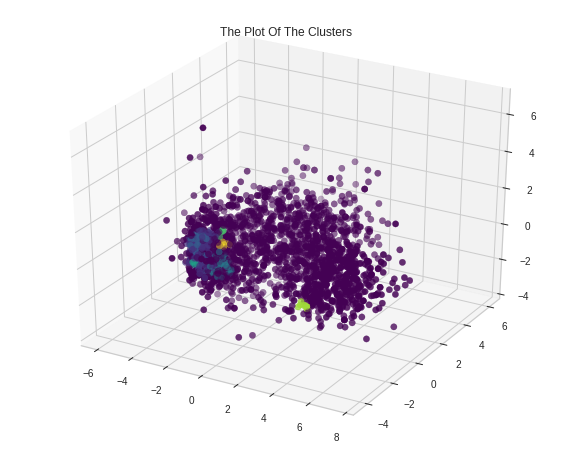

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [ ]:
#Initiating the BBSCAN Clustering model 
DP = DBSCAN(eps=0.4, min_samples=7000)
# fit model and predict clusters
DP_df2 = DP.fit_predict(PCA_ds)
PCA_ds["Clusters"] = DP_df2
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= DP_df2

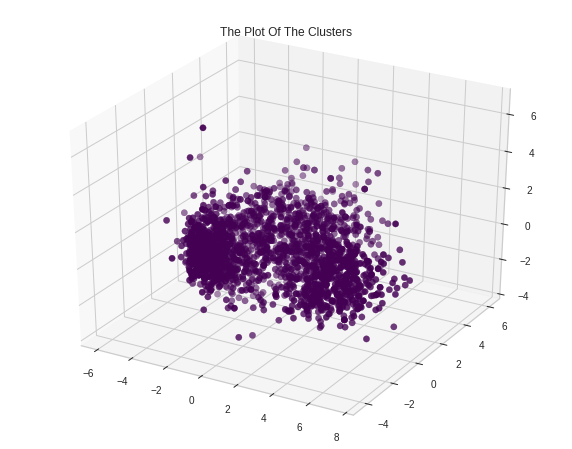

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

### **Agglomerative Clustering**

In [ ]:
#Import Library Dendogram dan Linkage

from scipy.cluster.hierarchy import linkage, dendrogram

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',

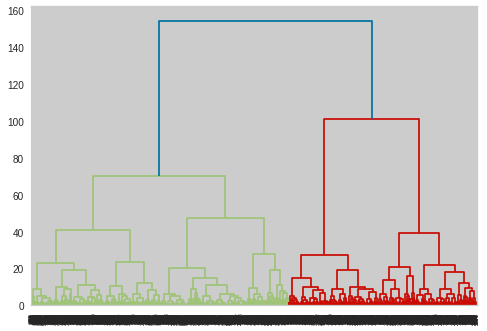

In [ ]:
var = linkage(PCA_ds, method = 'ward')
dendrogram(var)

In [ ]:
#Implementasi Agglomerative Clustering

ac = AgglomerativeClustering(n_clusters=4)
yhat_agglomerative = ac.fit_predict(PCA_ds)
PCA_ds["Cluster"] = yhat_agglomerative

#Adding the Clusters feature to the orignal dataframe.
df["Cluster"]= yhat_agglomerative

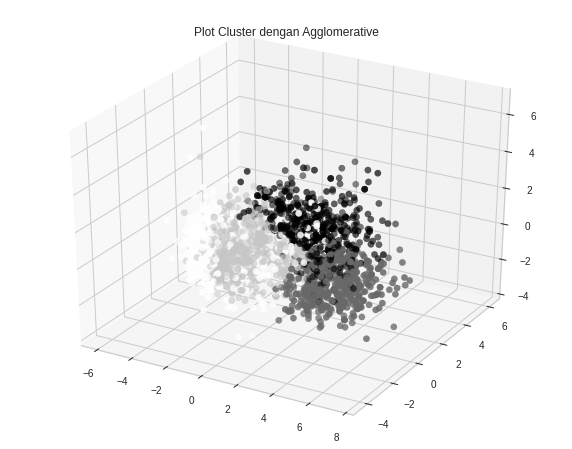

In [ ]:
#Plotting cluster

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Cluster"], marker='o')
ax.set_title("Plot Cluster dengan Agglomerative")

plt.show()

## **5. Analisis Cluster**

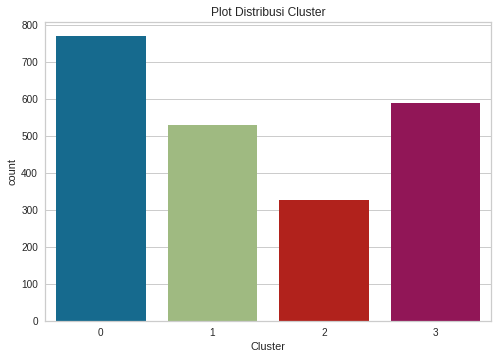

In [ ]:
#Distribusi Cluster

pl = sns.countplot(x=df["Cluster"])
pl.set_title("Plot Distribusi Cluster")
plt.show()

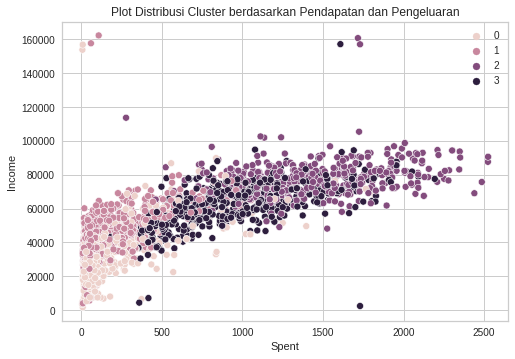

In [ ]:
#Distribusi Cluster berdasarkan Pendapatan dan Pengeluaran

pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Cluster"])
pl.set_title("Plot Distribusi Cluster berdasarkan Pendapatan dan Pengeluaran")
plt.legend()
plt.show()

Didapatkan pada plot distribusi berdasarkan pendapatan dan pengeluaran yaitu 


*   Group 0 : Pendapatan Rendah ; Pengeluaran Rendah
*   Group 1 : Pendapatan Rata-rata ; Pengeluaran Rendah
*   Group 2 : Pendapatan Tinggi ; Pengeluaran Tinggi
*   Group 3 : Pendapatan Rata-rata ; Pengeluaran Rata-rata

